### Airline Passengers Forecasting
Untill now, we have seen how to perform pre-processing on time series data. Refer to 'Data_Preprocessing' Jupyter notebook.
Let's implement ARIMA and SARIMA models to forecast the number of passengers.

Entire theoy and necessary terminologies (documentation for this assignment) are explained and written in 'readme.md', do refer to it.

In [29]:
# Importing necessary dependancies
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

In [30]:
# Import and read the data
df_airline=pd.read_csv('airline-passengers.csv')
df_airline.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [31]:
df_airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [32]:
df_airline.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [33]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [34]:
# Converting the date into datetime format [yyyy/mm/dd] so that it will be easy for plotting and time analysis.
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [35]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [36]:
df_airline.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [37]:
# setting month column as index column
df_airline.set_index('Month',inplace=True)

In [38]:
df_airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0.5, 1.0, 'Number of Passengers data')

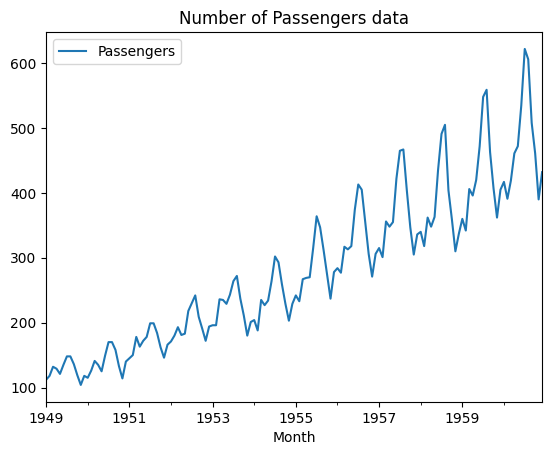

In [39]:
# lets plot the data. I have plotted simple graphs in this notebook. For gridlines and other plot features, use necessary functions.
df_airline.plot()
plt.title('Number of Passengers data')

In [40]:
# Let's perform Augmented Dickey–Fuller test (ADF) analysis
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p value: {}'.format(result[1]))
    print('Conclusion: \n')
    if result[1] <= 0.05:
        print("Data has no unit root and is stationary")
    else:
        print("Series has a unit root, indicating it is non-stationary ")


In [41]:
adf_test(df_airline['Passengers'])

ADF Statistics: 0.8153688792060441
p value: 0.9918802434376409
Conclusion: 

Series has a unit root, indicating it is non-stationary 


In [42]:
## Lets remove stationarity (Use Technique Differencing)
df_airline['Passengers First Difference']=df_airline['Passengers']-df_airline['Passengers'].shift(1)

In [43]:
# lets check its p value
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700034
p value: 0.05421329028382497
Conclusion: 

Series has a unit root, indicating it is non-stationary 


In [44]:
# removing seasonal component
df_airline['Passengers 12 Difference']=df_airline['Passengers']-df_airline['Passengers'].shift(12)

In [45]:
# lets check
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924796
p value: 0.011551493085515008
Conclusion: 

Data has no unit root and is stationary


In [46]:
# It is stationary now. Lets plot Autocorrelation function (ACF) and Partial Autocorrelation Function (PACF) to decide AR and MA component
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

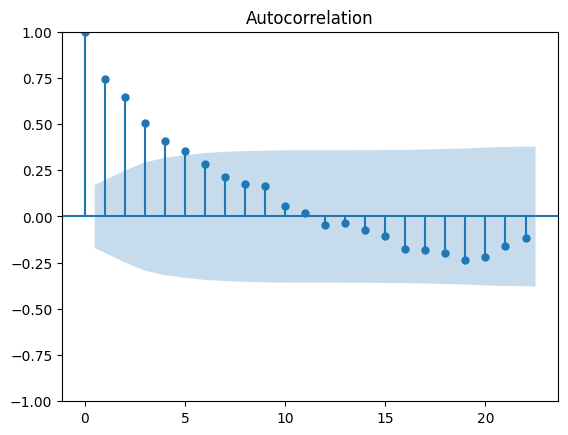

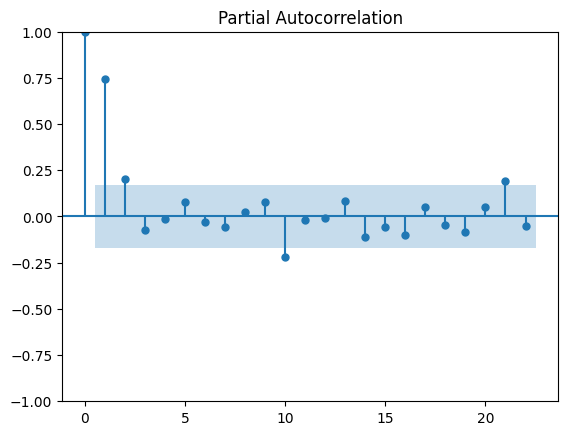

In [47]:
acf2 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf2 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [48]:
# lets split the data, test data will be used for forecasting.
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [49]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

### ARIMA Model

In [50]:
# create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [51]:
# Here I have taken AR and MA component as 12, since I am getting yearly trend and integrated value as 2, since first difference is not stationary.
model_ARIMA=ARIMA(train_data['Passengers'],order=(12,2,12))

c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [52]:
model_Arima_fit=model_ARIMA.fit()

c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   84
Model:               ARIMA(12, 2, 12)   Log Likelihood                -306.223
Date:                Mon, 09 Sep 2024   AIC                            662.445
Time:                        14:40:37   BIC                            722.613
Sample:                    01-01-1949   HQIC                           686.602
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3294      0.813     -0.405      0.685      -1.923       1.264
ar.L2         -0.5924      0.749     -0.791      0.429      -2.060       0.875
ar.L3         -0.3796      0.771     -0.492      0.622      -1.891       1.131
ar.L4         -0.5011      0.716     -0.700      0.484      -1.904       0.902
ar.L5         -0.4702      0.750     -0.627      0.531      -1.940       1.000
ar.L6         -0.3758      0.789     -0.476      0.634      -1.922       1.170
ar.L7         -0.5336      0.657     -0.812      0.417      -1.821       0.754
ar.L8         -0.4415      0.763     -0.579      0.563      -1.936       1.053
ar.L9         -0.5141      0.722     -0.712      0.477      -1.930       0.901
ar.L10        -0.4536      0.769     -0.590      0.555      -1.961       1.053
ar.L11        -0.3804      0.712     -0.534      0.593      -1.777       1.016
ar.L12         0.3539      0.659      0.537      0.591      -0.938       1.646
ma.L1         -0.8651      0.923     -0.937      0.349      -2.675       0.945
ma.L2          0.2990      1.093      0.274      0.784      -1.844       2.442
ma.L3         -0.4680      1.190     -0.393      0.694      -2.801       1.865
ma.L4          0.2880      1.283      0.224      0.822      -2.227       2.803
ma.L5         -0.0174      1.430     -0.012      0.990      -2.820       2.786
ma.L6         -0.2217      1.473     -0.151      0.880      -3.108       2.665
ma.L7          0.4035      1.289      0.313      0.754      -2.123       2.930
ma.L8         -0.5164      1.079     -0.479      0.632      -2.630       1.598
ma.L9          0.6574      0.816      0.805      0.421      -0.942       2.257
ma.L10        -0.5796      0.616     -0.940      0.347      -1.788       0.629
ma.L11         0.2752      0.486      0.566      0.571      -0.678       1.228
ma.L12        -0.1914      0.387     -0.495      0.621      -0.950       0.567
sigma2        77.0333     26.998      2.853      0.004      24.118     129.948
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.02
Prob(Q):                              0.84   Prob(JB):                         0.36
Heteroskedasticity (H):               2.23   Skew:                             0.38
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
#prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [55]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Passengers']-pred

<Axes: ylabel='Density'>

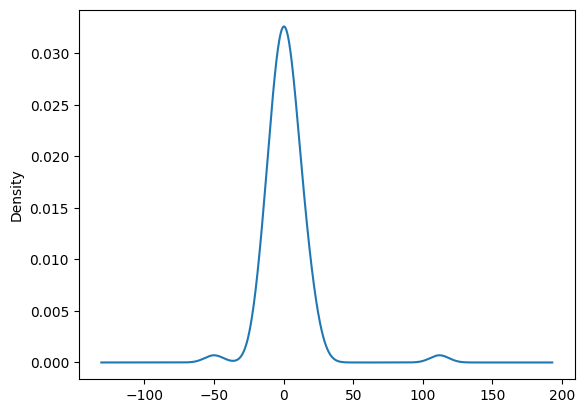

In [56]:
# residual plot
model_Arima_fit.resid.plot(kind='kde')

In [57]:
test_data['Predicted_ARIMA']=pred

C:\Users\Lalit\AppData\Local\Temp\ipykernel_13220\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


Text(0, 0.5, 'Number of passengers')

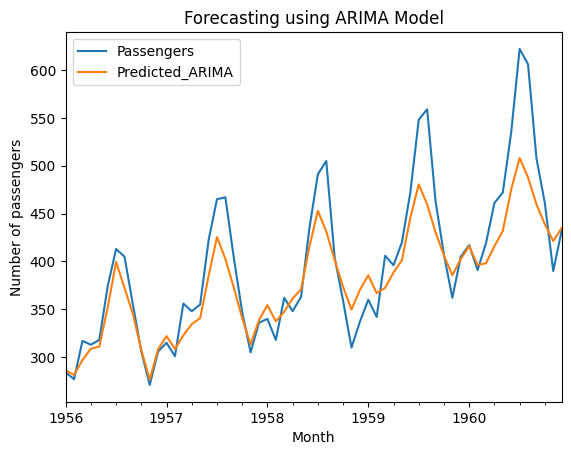

In [67]:
test_data[['Passengers','Predicted_ARIMA']].plot()
plt.title('Forecasting using ARIMA Model')
plt.ylabel('Number of passengers')

In [59]:
# Model is correcctly predicting the data. Lets improve the forecasting by introducing seasonal parameters in SARIMA Model

### SARIMA Model

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA=SARIMAX(train_data['Passengers'],order=(10,2,5),seasonal_order=(10,2,5,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parame

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Passengers   No. Observations:                   84
Model:             SARIMAX(10, 2, 5)x(10, 2, 5, 12)   Log Likelihood                -219.446
Date:                              Mon, 09 Sep 2024   AIC                            500.891
Time:                                      14:45:28   BIC                            564.765
Sample:                                  01-01-1949   HQIC                           525.771
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6977      8.068     -0.086      0.931     -16.510      15.114
ar.L2         -0.4666      5.574     -0.084      0.933     -11.391      10.458
ar.L3         -0.2109      8.915     -0.024      0.981     -17.684      17.262
ar.L4         -0.6884     10.073     -0.068      0.946     -20.432      19.055
ar.L5         -0.1831      5.747     -0.032      0.975     -11.447      11.080
ar.L6          0.2017      4.312      0.047      0.963      -8.249       8.653
ar.L7          0.0323      3.292      0.010      0.992      -6.419       6.484
ar.L8          0.1580      1.801      0.088      0.930      -3.372       3.688
ar.L9          0.2907      1.952      0.149      0.882      -3.534       4.116
ar.L10         0.2073      2.011      0.103      0.918      -3.734       4.148
ma.L1         -0.6772     35.639     -0.019      0.985     -70.528      69.174
ma.L2         -0.0077     16.036     -0.000      1.000     -31.437      31.422
ma.L3         -0.4008     12.620     -0.032      0.975     -25.135      24.333
ma.L4          0.7629      8.263      0.092      0.926     -15.432      16.958
ma.L5         -0.6719     20.821     -0.032      0.974     -41.481      40.137
ar.S.L12       0.2685    726.347      0.000      1.000   -1423.345    1423.882
ar.S.L24      -0.0725    199.569     -0.000      1.000    -391.220     391.075
ar.S.L36      -0.5293    291.549     -0.002      0.999    -571.955     570.896
ar.S.L48       0.1898    397.000      0.000      1.000    -777.916     778.296
ar.S.L60       0.4736   1001.078      0.000      1.000   -1961.603    1962.550
ar.S.L72      -0.3063    594.153     -0.001      1.000   -1164.825    1164.212
ar.S.L84      -0.0705    284.413     -0.000      1.000    -557.510     557.369
ar.S.L96       0.5556    506.718      0.001      0.999    -992.594     993.705
ar.S.L108     -0.5171    515.650     -0.001      0.999   -1011.172    1010.138
ar.S.L120      0.1460    626.101      0.000      1.000   -1226.990    1227.282
ma.S.L12      -0.3227   2462.320     -0.000      1.000   -4826.382    4825.737
ma.S.L24      -0.7467   1765.726     -0.000      1.000   -3461.507    3460.013
ma.S.L36      -0.2172    670.675     -0.000      1.000   -1314.716    1314.282
ma.S.L48      -0.0721    691.323     -0.000      1.000   -1355.040    1354.896
ma.S.L60       0.5042   3444.847      0.000      1.000   -6751.272    6752.280
sigma2         5.7927   1.53e+04      0.000      1.000   -3.01e+04    3.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.98   Prob(JB):                         0.54
Heteroskedasticity (H):               1.73   Skew:                             0.34
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.21
=========

In [61]:
test_data.tail(2)

,Passengers,Passengers First Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,
1960-11-01,390,-71.0,28.0,421.245710
1960-12-01,432,42.0,27.0,434.944445


<Axes: xlabel='Month'>

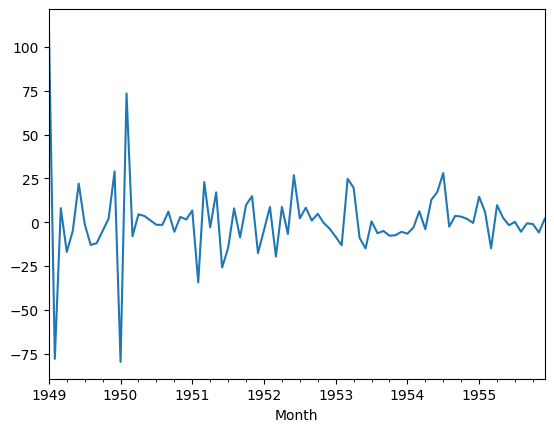

In [63]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Passengers']-pred_Sarima

model_SARIMA_fit.resid.plot()

In [64]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\Lalit\AppData\Local\Temp\ipykernel_13220\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


Text(0, 0.5, 'Number of passengers')

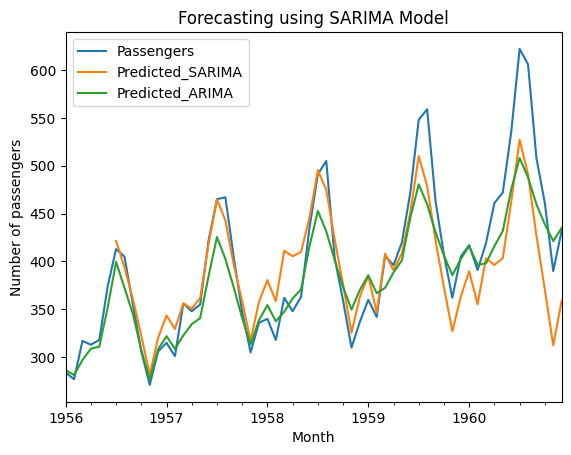

In [65]:
test_data[['Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()
plt.title('Forecasting using SARIMA Model')
plt.ylabel('Number of passengers')

In [66]:
# We can clearly observe that SARIMA is predicitng the data more correctly when it comes to peak (correctly tackling the seasonal change.)